In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("/Volumes/part3/LocallyWeightedReg/weightedX.csv")
dfy = pd.read_csv("/Volumes/part3/LocallyWeightedReg/weightedY.csv")

X = dfx.values
Y = dfy.values

In [3]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


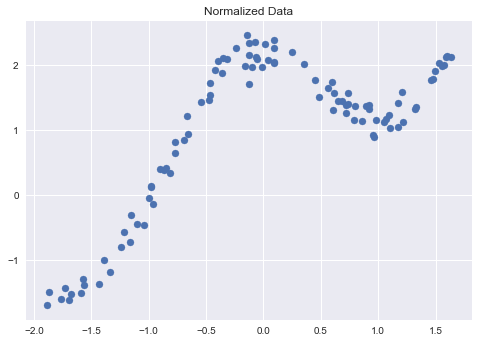

In [7]:
## Normalize the data

X = (X-X.mean())/X.std()
plt.style.use("seaborn")
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

## FInding w --> weighted loss where w is a diagonal matrix.

In [19]:
a = np.eye(4)
print(type(a))
b = np.mat(x)
print(type(b))

## Difference between numpy array and matrices :
## if we do a*b ->
## 1) if a and b are matrices ==> a*b is matrix multiplication
## 2) if a and b are numpya array ==> a*b is element wise multiplication.

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [116]:
def getW(X , querypt , tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        W[i,i] = np.exp( (-( (np.dot( (xi-querypt) , (xi-querypt).T )) ))/(2*tau*tau))
        
    return W

In [117]:
X = np.mat(X)
Y = np.mat(Y)
m = X.shape[0]
W = getW(X, -1, 1)
print(W.shape)
print(W[:3,:3])

(99, 99)
[[0.81327022 0.         0.        ]
 [0.         0.98353311 0.        ]
 [0.         0.         0.81193405]]


In [118]:
print(X[:9,:])

[[-0.35705077]
 [-0.8177695 ]
 [-0.35449839]
 [ 0.56434066]
 [-0.0695723 ]
 [ 1.63427275]
 [-1.23691358]
 [ 0.0964585 ]
 [-0.15934525]]


In [119]:
print(X[2])

[[-0.35449839]]


In [120]:
a = X[2]
b = -1
c =a-b
d=(a-b).T
print(c,d)

[[0.64550161]] [[0.64550161]]


In [121]:
a = np.array([2,3])
q = [1,1]
c = a-q
d = (a-q).T
print(c,d)
np.dot(c,d)

[1 2] [1 2]


5

In [122]:
print(W.shape)

(99, 99)


In [123]:
np.hstack?

In [124]:
a = np.ones((3,1))
b = np.zeros((3,1))
print(a)
print(b)
np.hstack((a,b))


[[1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]]


array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [125]:
#try
a = np.array([1,2])
b = np.array([3,4])
print(np.dot(a,b))

11


## Making Predictions

In [126]:
def predict(X,Y,querypt,tau):
    m = X.shape[0]
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))
    
    queryx = np.mat([querypt , 1])
    #print(queryx)
    W = getW(X,querypt , tau)
    
    theta = np.linalg.pinv(X_.T*W*X_)*(X_.T*W*Y)
    pred = np.dot(queryx , theta)
    return theta , pred
    

In [127]:
theta , pred = predict(X,Y,1.0,1.0)
print(theta)

[[0.14069504]
 [1.45348191]]


In [128]:
print(theta.shape)

(2, 1)


In [129]:
print(pred)
print(type(X))

[[1.59417694]]
<class 'numpy.matrixlib.defmatrix.matrix'>


## Visualize Predictions , Analyze tau 

In [130]:
def plotPredictions(tau):
    Xtest = np.linspace(-2,2,20)
    Ytest = []
    
    for qx in Xtest:
        theta , pred = predict(X,Y,qx ,tau)
        Ytest.append(pred[0][0])
        
    Ytest = np.array(Ytest)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(Xtest , Ytest , c='r')
    plt.show()
    

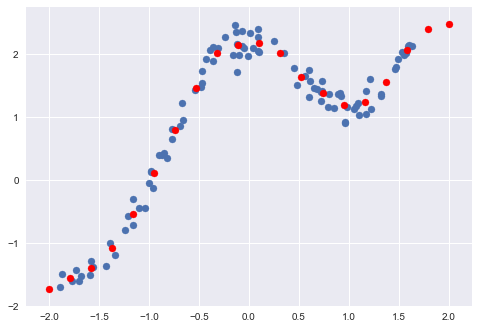

In [132]:
plotPredictions(0.1)